# Hands On - Penjualan Sepeda

Dataset:
- ID: Unique identifier for each entry.
- Marital Status: Categorical (Married, Single) with some missing values.
- Gender: Categorical (Male, Female) with some missing values.
- Income: Numerical, with some missing values.
- Children: Numerical, representing the number of children, with some missing values.
- Education: Categorical, representing the highest education level.
- Occupation: Categorical, representing the job type.
- Home Owner: Categorical (Yes, No) with some missing values.
- Cars: Numerical, representing the number of cars owned, with some missing values.
- Commute Distance: Categorical (e.g., "0-1 Miles", "2-5 Miles").
- Region: Categorical, representing geographic regions (e.g., "Europe", "Pacific").
- Age: Numerical, with some missing values.
- Purchased Bike: Target variable for classification (Yes/No).


## Data Understanding

In [1]:
import pandas as pd

data = pd.read_csv('penjualan_sepeda.csv')
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


(      ID Marital Status  Gender   Income  Children        Education  \
 0  12496        Married  Female  40000.0       1.0        Bachelors   
 1  24107        Married    Male  30000.0       3.0  Partial College   
 2  14177        Married    Male  80000.0       5.0  Partial College   
 3  24381         Single     NaN  70000.0       0.0        Bachelors   
 4  25597         Single    Male  30000.0       0.0        Bachelors   
 
        Occupation Home Owner  Cars Commute Distance   Region   Age  \
 0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
 1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
 2    Professional         No   2.0        2-5 Miles   Europe  60.0   
 3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
 4        Clerical         No   0.0        0-1 Miles   Europe  36.0   
 
   Purchased Bike  
 0             No  
 1             No  
 2             No  
 3            Yes  
 4            Yes  ,
 None)

In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,19965.992000,5347.333948,11000.0,15290.75,19744.0,24470.75,29447.0
Income,994.0,56267.605634,31067.817462,10000.0,30000.00,60000.0,70000.00,170000.0
Children,992.0,1.910282,1.626910,0.0,0.00,2.0,3.00,5.0
Cars,991.0,1.455096,1.121755,0.0,1.00,1.0,2.00,4.0
Age,992.0,44.181452,11.362007,25.0,35.00,43.0,52.00,89.0


## Handling Missing Value

In [3]:
missing_values = data.isnull().sum()

data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Income'].fillna(data['Income'].median(), inplace=True)
data['Children'].fillna(data['Children'].median(), inplace=True)
data['Home Owner'].fillna(data['Home Owner'].mode()[0], inplace=True)
data['Cars'].fillna(data['Cars'].median(), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

missing_values_after = data.isnull().sum()
missing_values, missing_values_after


(ID                   0
 Marital Status       7
 Gender              11
 Income               6
 Children             8
 Education            0
 Occupation           0
 Home Owner           4
 Cars                 9
 Commute Distance     0
 Region               0
 Age                  8
 Purchased Bike       0
 dtype: int64,
 ID                  0
 Marital Status      0
 Gender              0
 Income              0
 Children            0
 Education           0
 Occupation          0
 Home Owner          0
 Cars                0
 Commute Distance    0
 Region              0
 Age                 0
 Purchased Bike      0
 dtype: int64)

Now that the data is clean, Next in EDA. Let's check this out:
- Distribution of numerical variables
- Proportions of categorical variables
- Correlation between features
- Checking the target variable distribution ("Purchased Bike")

## EDA

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

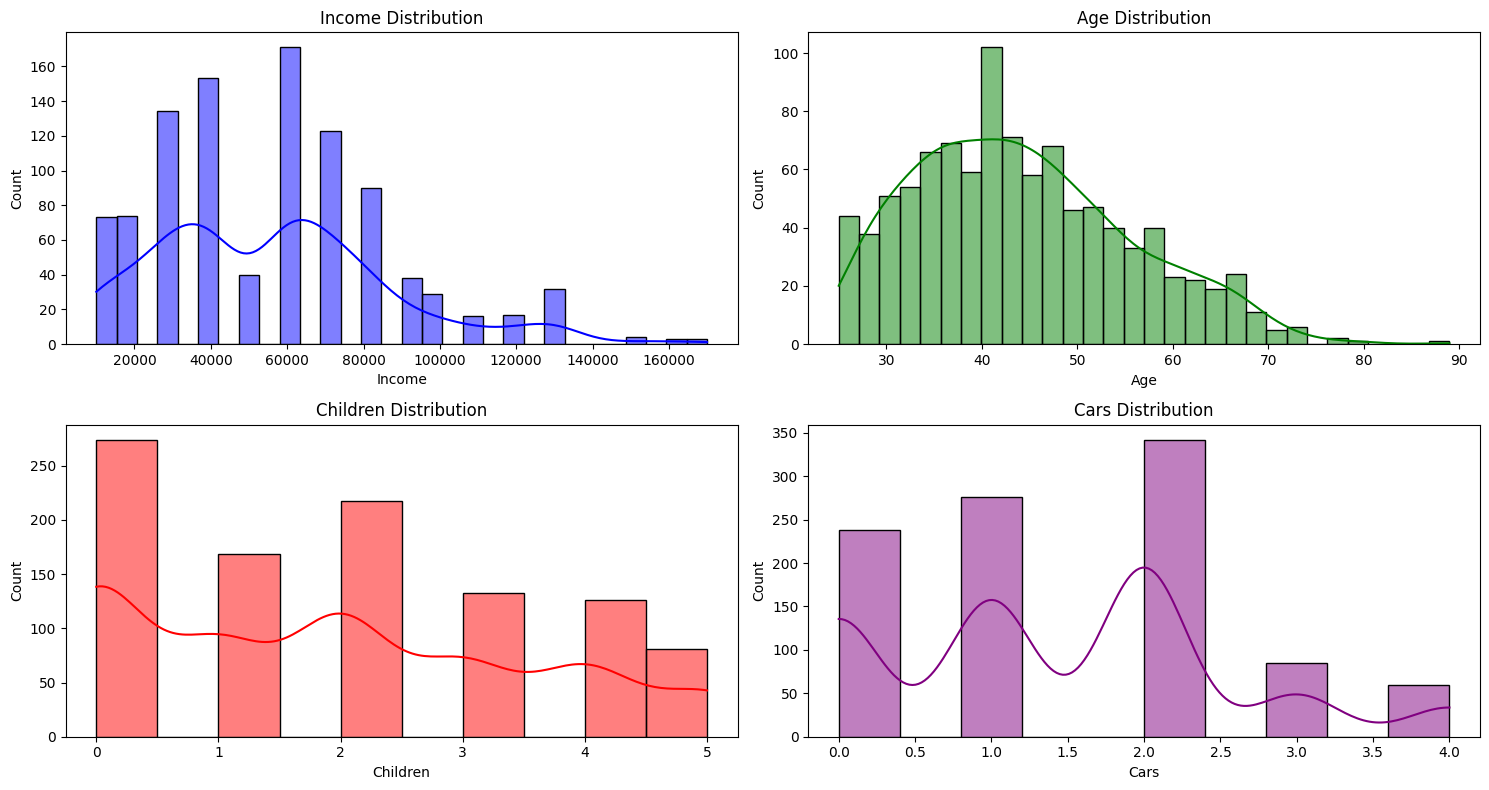

(                 ID         Income     Children         Cars          Age
 count   1000.000000    1000.000000  1000.000000  1000.000000  1000.000000
 mean   19965.992000   56290.000000     1.911000     1.451000    44.172000
 std     5347.333948   30975.722678     1.620403     1.117519    11.316912
 min    11000.000000   10000.000000     0.000000     0.000000    25.000000
 25%    15290.750000   30000.000000     0.000000     1.000000    35.000000
 50%    19744.000000   60000.000000     2.000000     1.000000    43.000000
 75%    24470.750000   70000.000000     3.000000     2.000000    52.000000
 max    29447.000000  170000.000000     5.000000     4.000000    89.000000,
 Purchased Bike
 No     0.519
 Yes    0.481
 Name: proportion, dtype: float64)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_summary = data.describe()

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['Income'], kde=True, bins=30, color='blue')
plt.title('Income Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['Age'], kde=True, bins=30, color='green')
plt.title('Age Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['Children'], kde=True, bins=10, color='red')
plt.title('Children Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['Cars'], kde=True, bins=10, color='purple')
plt.title('Cars Distribution')

plt.tight_layout()
plt.show()

target_distribution = data['Purchased Bike'].value_counts(normalize=True)

numeric_summary, target_distribution


**Numerical features:**
- The Income has a wide range from 10K usd to 170K usd, with a median around 60k usd
- The Age distribution is skewed toward middle-aged individuals (median around 43 years old)
- Most customers have between 0 to 3 children (median is 2), and the number of Cars owned ranges from 0 to 4 (median is 1)


**Target variable:**
- The distribution of the target variable "Purchased Bike" is fairly balanced: 52% did not purchase a bike, while 48% did.

## Multicollinearity Check
VIF measures the correlation between one predictor variable and other predictor variables in a multiple regression model.  A high VIF indicates that the variable is highly correlated with other variables in the model, potentially leading to multicollinearity issues.

* **VIF close to 1:** Indicates that the variable is not correlated with other variables. This is ideal.
* **VIF between 1 and 5:** Generally considered acceptable, suggesting moderate correlation.
* **VIF greater than 5 or 10:**  Indicates high correlation between the variable and others. This can be problematic, as it can lead to unstable coefficient estimates and difficulty in interpreting the individual effects of the predictors.

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_features = data.select_dtypes(include=['number'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data)

    feature        VIF
0        ID   8.207886
1    Income   5.128954
2  Children   3.345802
3      Cars   3.450746
4       Age  12.634185


Next steps:
1. Address Multicollinearity:
   - Remove one of the highly correlated features. You can prioritize based on:
      - Feature importance (e.g., using feature importance from a model)
      - Theoretical understanding of the data (which feature is less relevant)
      - Practical considerations (which feature is easier to collect/measure)
   - Combine correlated features into a new feature (e.g., create an 'asset' score by summing 'income' and 'cars').
   - Use regularization techniques (e.g., Ridge or Lasso regression) to mitigate the impact of multicollinearity.
2. Re-evaluate VIF: After taking steps to reduce multicollinearity, recalculate VIF to check if it has improved.
3. Continue with Model Building: Once you've addressed multicollinearity, you can proceed with model building and feature selection.

In [6]:
features_with_high_vif = vif_data[vif_data.VIF > 5]['feature'].tolist()

if features_with_high_vif:
  if 'Age' in features_with_high_vif:
    data = data.drop('Age', axis=1)
    print("Removed 'Age' due to high VIF")

  numerical_features = data.select_dtypes(include=['number'])
  vif_data = pd.DataFrame()
  vif_data["feature"] = numerical_features.columns
  vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]
  print(vif_data)

Removed 'Age' due to high VIF
    feature       VIF
0        ID  3.803156
1    Income  4.771330
2  Children  2.588901
3      Cars  3.440561


## Select K-Best

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_feature_indices]

print("Selected features:", selected_features)

Selected features: ['Marital Status', 'Children', 'Education', 'Cars', 'Commute Distance']


## Data Pre-processing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
# Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

## Data Split

## Modeling

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# import dask.dataframe as dd
from matplotlib import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Accuracy:  0.725
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       106
           1       0.72      0.67      0.70        94

    accuracy                           0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



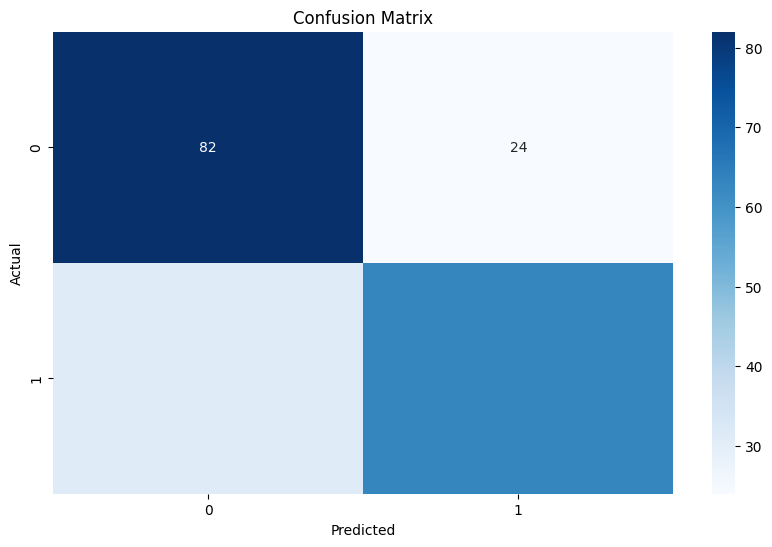

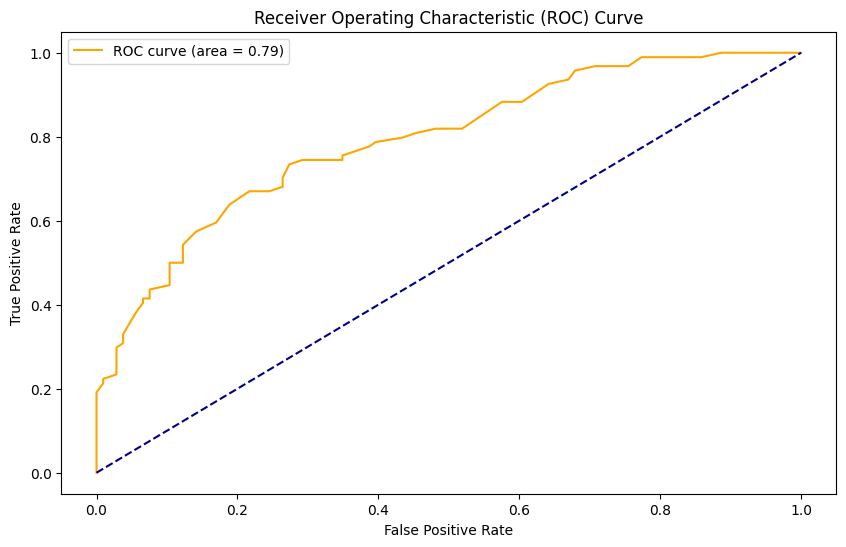

In [11]:
# train model using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict
y_pred_RF = model_RF.predict(X_test)

# Evaluate Model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF, average="weighted")
recall_RF = recall_score(y_test, y_pred_RF, average="weighted")
f1_RF = f1_score(y_test, y_pred_RF, average="weighted")

print('Accuracy: ', accuracy_RF)
print('Classification Report: \n', classification_report(y_test, y_pred_RF))

# confusion matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [34]:
X_train.drop(columns=['ID'], axis=1)
X_test.drop(columns=['ID'], axis=1)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region
521,1,1,40000.0,4.0,2,3,1,2.0,2,1
737,0,1,70000.0,2.0,4,4,0,2.0,1,1
740,0,1,40000.0,4.0,3,0,0,0.0,0,1
660,0,0,60000.0,1.0,1,3,1,0.0,3,1
411,0,1,70000.0,5.0,3,4,1,2.0,4,2
...,...,...,...,...,...,...,...,...,...,...
408,1,0,40000.0,2.0,3,0,1,0.0,0,0
332,1,0,20000.0,0.0,4,2,0,2.0,1,0
208,1,0,40000.0,0.0,1,0,1,0.0,0,0
613,1,1,110000.0,1.0,3,3,1,4.0,4,1


Accuracy:  0.695
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       106
           1       0.68      0.66      0.67        94

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



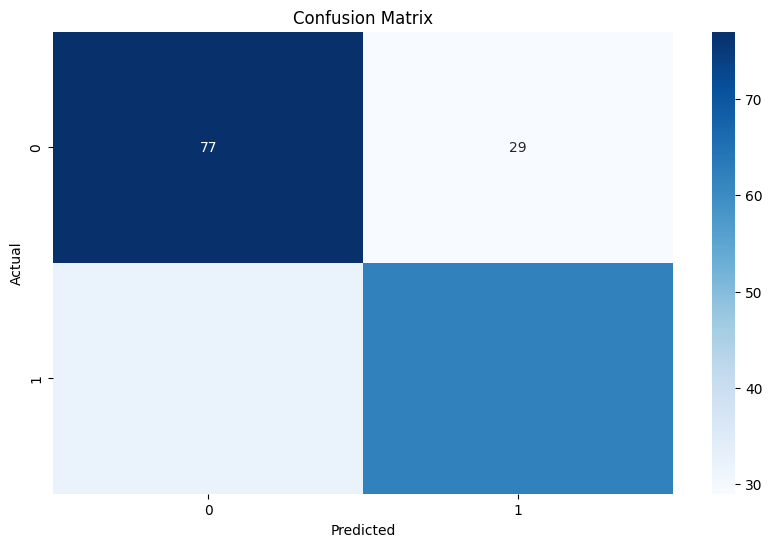

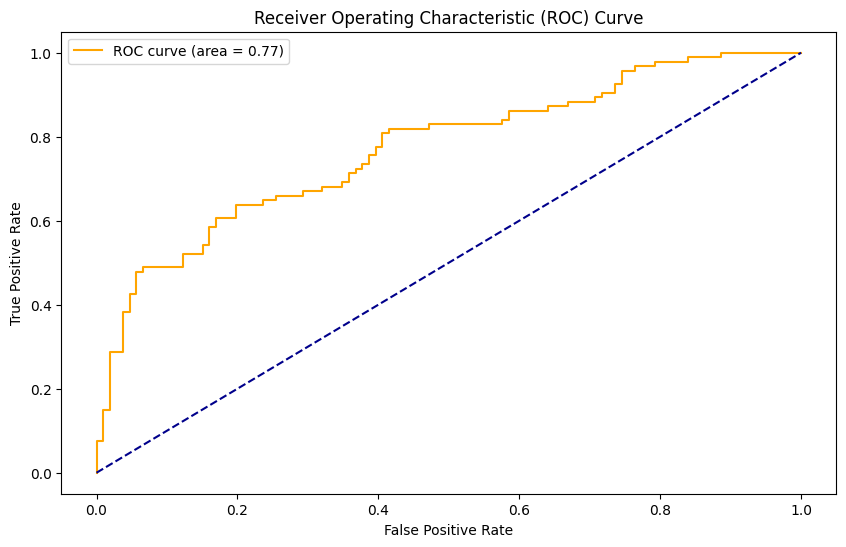

In [35]:
# train model using XGBoost
from xgboost import XGBClassifier

# Train Model
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

# Predict
y_pred_XGB = model_XGB.predict(X_test)

# Evaluate Model
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
precision_XGB = precision_score(y_test, y_pred_XGB, average="weighted")
recall_XGB = recall_score(y_test, y_pred_XGB, average="weighted")
f1_XGB = f1_score(y_test, y_pred_XGB, average="weighted")

print('Accuracy: ', accuracy_XGB)
print('Classification Report: \n', classification_report(y_test, y_pred_XGB))

# confusion matrix
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# check model performance using ROC AUC
y_pred_prob = model_XGB.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

# Rentang n_estimators (1-15)
n_estimators_range = range(1, 26)
mean_scores = []  # Menyimpan rata-rata skor cross-validation

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_scores.append(np.mean(scores))


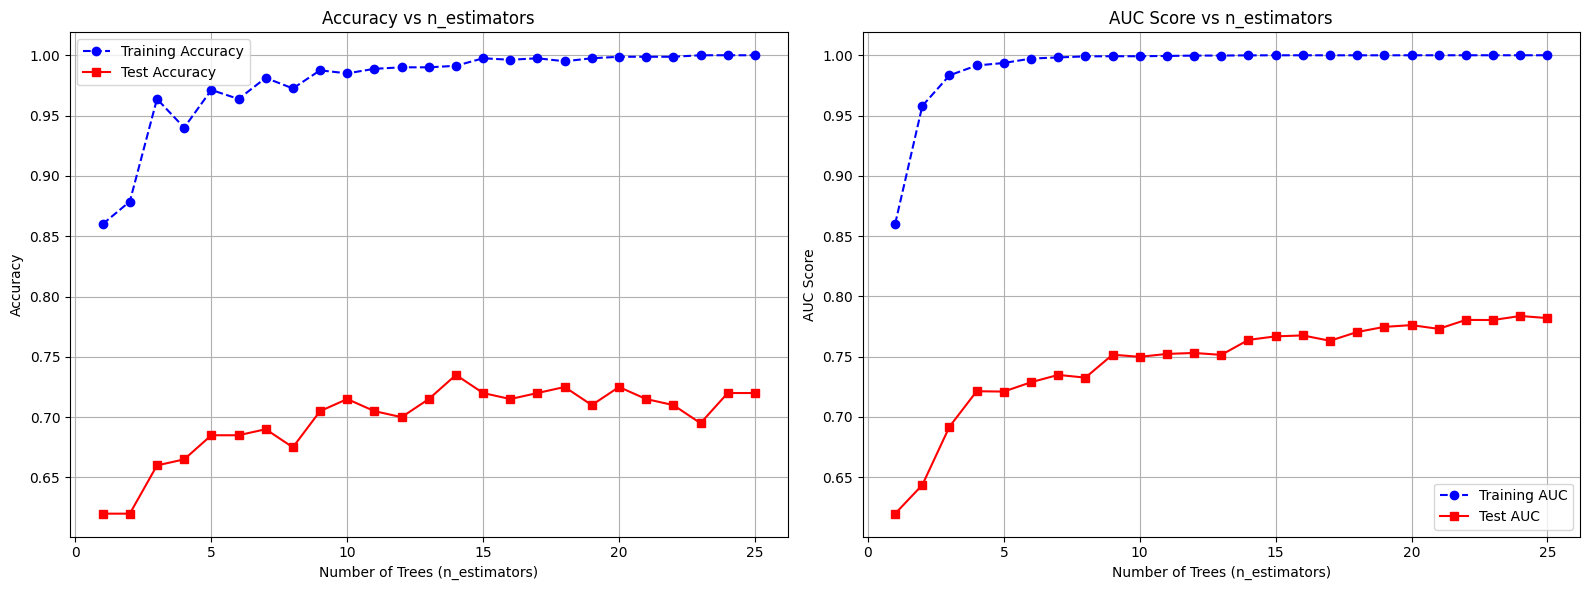

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Range for n_estimators
n_estimators_range = range(1, 26)

# Store metrics for Training and Test data
train_accuracy = []
test_accuracy = []
train_auc = []
test_auc = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Accuracy
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    
    # AUC Score
    train_auc.append(roc_auc_score(y_train, y_train_proba))
    test_auc.append(roc_auc_score(y_test, y_test_proba))

# Plot Accuracy and AUC
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Accuracy Scores
ax[0].plot(n_estimators_range, train_accuracy, marker='o', linestyle='--', color='b', label='Training Accuracy')
ax[0].plot(n_estimators_range, test_accuracy, marker='s', linestyle='-', color='r', label='Test Accuracy')
ax[0].set_title('Accuracy vs n_estimators')
ax[0].set_xlabel('Number of Trees (n_estimators)')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Plot AUC Scores
ax[1].plot(n_estimators_range, train_auc, marker='o', linestyle='--', color='b', label='Training AUC')
ax[1].plot(n_estimators_range, test_auc, marker='s', linestyle='-', color='r', label='Test AUC')
ax[1].set_title('AUC Score vs n_estimators')
ax[1].set_xlabel('Number of Trees (n_estimators)')
ax[1].set_ylabel('AUC Score')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [26]:
# Define RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Explore tree depths
    'min_samples_split': [2, 5, 10]  # Explore minimum samples for split
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy for evaluation
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 15, 'min_samples_split': 2}
Best Accuracy Score: 0.71375


In [28]:
# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Predictions
y_test_pred = best_rf.predict(X_test)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Test Accuracy: 0.7250
Test AUC: 0.8055


## XGBoost

In [31]:
# Define XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
param_dist = {
    'max_depth': range(3, 11),  # Explore depths from 3 to 10
    'min_child_weight': range(1, 10)  # Explore min_child_weight from 1 to 9
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_child_weight': 1, 'max_depth': 9}
Best Accuracy Score: 0.685


c:\Users\fizuf\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:52:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
# Get the best model from RandomizedSearchCV
best_xgb = random_search.best_estimator_

# Predictions
y_test_pred = best_xgb.predict(X_test)
y_test_proba = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Test Accuracy: 0.7050
Test AUC: 0.7892


## Random Search

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


# Define XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
param_dist = {
    'max_depth': range(3, 11),  # Explore depths from 3 to 10
    'min_child_weight': range(1, 10)  # Explore min_child_weight from 1 to 9
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Accuracy (RandomizedSearchCV):", random_search.best_score_)


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fizuf\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\fizuf\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                         

Best Parameters (RandomizedSearchCV): {'min_child_weight': 1, 'max_depth': 9}
Best Accuracy (RandomizedSearchCV): 0.685
